# Carregar bibliotecas

Nesta seção, carregamos as bibliotecas essenciais para o nosso projeto. `six` e `pydotplus` são usadas para visualização da árvore de decisão, e `numpy`, `pandas` e `sklearn.metrics` são fundamentais para análise de dados e construção do modelo de machine learning.

In [1]:
!pip install six

# Instalar pydotplus

Este passo garante que a biblioteca `pydotplus` esteja instalada, o que é necessário para gerar a representação gráfica da árvore de decisão.

In [2]:
%pip install pydotplus

# Carregar bibliotecas para análise de dados e machine learning

Importamos as bibliotecas `numpy` e `pandas` para manipulação e análise de dados, e a biblioteca `sklearn` para funções de machine learning, especificamente o módulo `metrics` para avaliar o desempenho do modelo.

In [3]:
# Load libraries
import numpy as np
import pandas as pd
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

# Importando o Dataset

Aqui, carregamos o dataset "Play Tennis.csv" para um DataFrame pandas chamado `df`. Este dataset contém informações sobre as condições climáticas e se o tênis foi jogado ou não. A variável `value` armazena os nomes das colunas que representam as características (features) do dataset.

In [19]:
df=pd.read_csv("Play Tennis.csv")
value=['Outlook','Temprature','Humidity','Wind']
df

,Day,Outlook,Temprature,Humidity,Wind,Play_Tennis
0,D1,Sunny,Hot,High,Weak,No
1,D2,Sunny,Hot,High,Strong,No
2,D3,Overcast,Hot,High,Weak,Yes
3,D4,Rain,Mild,High,Weak,Yes
4,D5,Rain,Cool,Normal,Weak,Yes
5,D6,Rain,Cool,Normal,Strong,No
6,D7,Overcast,Cool,Normal,Strong,Yes
7,D8,Sunny,Mild,High,Weak,No
8,D9,Sunny,Cool,Normal,Weak,Yes
9,D10,Rain,Mild,Normal,Weak,Yes


# Análise de Dados

Nesta seção, realizamos uma análise exploratória básica do dataset para entender sua estrutura e conteúdo.

- `len(df)`: Mostra o número total de linhas (registros) no dataset.
- `df.shape`: Exibe o número de linhas e colunas.
- `df.head()`: Mostra as primeiras 5 linhas do dataset.
- `df.tail()`: Mostra as últimas 5 linhas do dataset.
- `df.describe()`: Fornece estatísticas descritivas sobre as colunas do dataset, como contagem, valores únicos, valor mais frequente (top) e sua frequência.

In [20]:
len(df)           #Tamanho do Dataset

14

In [21]:
df.shape  #Para ver o número de linhas e colunas no nosso dataset:

(14, 6)

In [22]:
df.head()         #Para inspecionar os primeiros cinco registros do dataset:

,Day,Outlook,Temprature,Humidity,Wind,Play_Tennis
0,D1,Sunny,Hot,High,Weak,No
1,D2,Sunny,Hot,High,Strong,No
2,D3,Overcast,Hot,High,Weak,Yes
3,D4,Rain,Mild,High,Weak,Yes
4,D5,Rain,Cool,Normal,Weak,Yes


In [23]:
df.tail()         #Para inspecionar os últimos cinco registros do dataset:

,Day,Outlook,Temprature,Humidity,Wind,Play_Tennis
9,D10,Rain,Mild,Normal,Weak,Yes
10,D11,Sunny,Mild,Normal,Strong,Yes
11,D12,Overcast,Mild,High,Strong,Yes
12,D13,Overcast,Hot,Normal,Weak,Yes
13,D14,Rain,Mild,High,Strong,No


In [24]:
df.describe()     #Para ver detalhes estatísticos do dataset:

,Day,Outlook,Temprature,Humidity,Wind,Play_Tennis
count,14,14,14,14,14,14
unique,14,3,3,2,2,2
top,D1,Sunny,Mild,High,Weak,Yes
freq,1,5,6,7,8,9


# Preparando os Dados (Fatiamento de Dados)

Como algoritmos de machine learning trabalham com dados numéricos, precisamos converter as colunas categóricas do nosso dataset para um formato numérico. Utilizamos `LabelEncoder` do scikit-learn para essa tarefa. Em seguida, separamos o dataset em conjuntos de atributos (`X`) e rótulo (`y`), onde `X` contém as colunas usadas para prever (`Outlook`, `Temprature`, `Humidity`, `Wind`) e `y` contém a coluna alvo (`Play_Tennis`). Finalmente, dividimos esses conjuntos em dados de treino e teste para avaliar o desempenho do modelo.

In [25]:
# algoritmos de machine learning só podem aprender com números (int, float, doubles ..)
# então vamos codificá-lo para int
from sklearn import preprocessing
string_to_int= preprocessing.LabelEncoder()                     #codificar seus dados
df=df.apply(string_to_int.fit_transform) #ajustar e transformar
df

,Day,Outlook,Temprature,Humidity,Wind,Play_Tennis
0,0,2,1,0,1,0
1,6,2,1,0,0,0
2,7,0,1,0,1,1
3,8,1,2,0,1,1
4,9,1,0,1,1,1
5,10,1,0,1,0,0
6,11,0,0,1,0,1
7,12,2,2,0,1,0
8,13,2,0,1,1,1
9,1,1,2,1,1,1


In [26]:
#Para dividir nossos dados em conjunto de atributos e Rótulo:
feature_cols = ['Outlook','Temprature','Humidity','Wind']
X = df[feature_cols ]                               #contém o atributo
y = df.Play_Tennis                                  #contém o rótulo

In [27]:
#Para dividir nossos dados em conjuntos de treinamento e teste:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

# Treinamento e Previsão

Nesta etapa, treinamos um modelo de árvore de decisão usando os dados de treino.

- Importamos `DecisionTreeClassifier` do scikit-learn.
- Criamos um objeto classificador, definindo o critério de divisão como "entropy" e um `random_state` para reprodutibilidade.
- Utilizamos o método `fit()` para treinar o classificador com os dados de treino (`X_train` e `y_train`).
- Após o treinamento, usamos o método `predict()` para fazer previsões no conjunto de teste (`X_test`).

In [28]:
# realizar treinamento
from sklearn.tree import DecisionTreeClassifier                             # importar o classificador
classifier =DecisionTreeClassifier(criterion="entropy", random_state=100)     # criar um objeto classificador
classifier.fit(X_train, y_train)                                              # ajustar o classificador com dados X e Y

DecisionTreeClassifier(criterion='entropy', random_state=100)

In [29]:
#Prever a resposta para o dataset de teste
y_pred= classifier.predict(X_test)

In [30]:
# Acurácia do Modelo, com que frequência o classificador está correto?
from sklearn.metrics import accuracy_score
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8


- Agora vamos comparar alguns dos nossos valores previstos com os valores reais e ver o quão precisos fomos:

Criamos um DataFrame pandas (`data_p`) para visualizar lado a lado os valores reais (`y_test`) e os valores previstos pelo modelo (`y_pred`). Isso nos permite uma inspeção visual do desempenho das previsões.

In [31]:
data_p=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
data_p

,Actual,Predicted
2,1,1
0,0,0
4,1,1
10,1,0
1,0,0


# Avaliando o Algoritmo

Para avaliar formalmente o desempenho do nosso modelo, utilizamos métricas comuns de classificação.

- Importamos `confusion_matrix` e `classification_report` do scikit-learn.
- A matriz de confusão (`confusion_matrix`) mostra a contagem de resultados de predição (verdadeiros positivos, verdadeiros negativos, falsos positivos e falsos negativos).
- O relatório de classificação (`classification_report`) fornece métricas como precisão (precision), recall, F1-score e suporte (support) para cada classe, além de métricas de média (macro avg e weighted avg). Essas métricas ajudam a entender a performance do modelo em diferentes aspectos.

In [32]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[2 0]
 [1 2]]
              precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       1.00      0.67      0.80         3

    accuracy                           0.80         5
   macro avg       0.83      0.83      0.80         5
weighted avg       0.87      0.80      0.80         5



# Visualizando Árvores de Decisão

Finalmente, visualizamos a estrutura da árvore de decisão treinada. Utilizamos a função `plot_tree` do scikit-learn para gerar uma representação gráfica da árvore, onde cada nó representa uma decisão baseada em uma característica, e as folhas representam a previsão final. Isso ajuda a entender como o modelo chegou às suas previsões.

- Agora vamos comparar alguns dos nossos valores previstos com os valores reais e ver o quão precisos fomos:

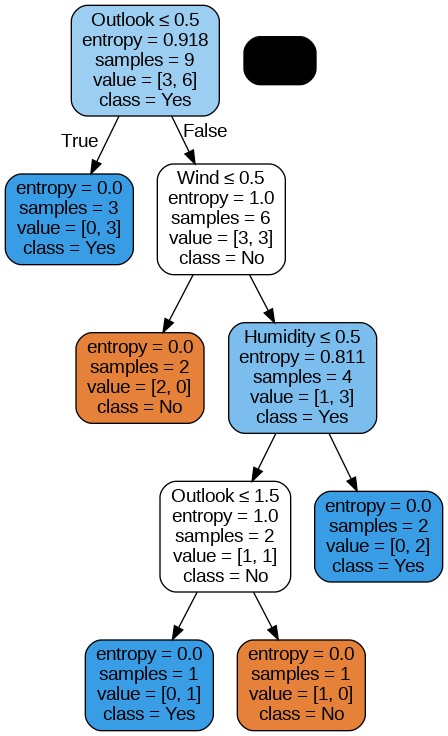

In [35]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

dot_data = StringIO()
export_graphviz(classifier, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['No','Yes'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())